In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as l

In [22]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\archive (3)\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

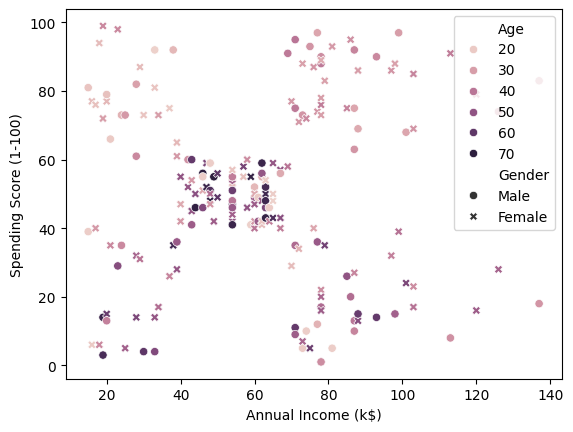

In [23]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Age',style='Gender')

In [24]:
df.isnull().values.any()

False

In [25]:
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
data=df[features].copy()
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [26]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [27]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,4.608654,4.360984,5.518367
std,2.417713,1.937561,2.371548
min,1.000000,1.000000,1.000000
25%,2.860577,2.954918,4.099490
50%,4.115385,4.430328,5.500000
75%,6.365385,5.647541,7.612245
max,10.000000,10.000000,10.000000


In [28]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,1.173077,1.000000,4.489796
1,1.519231,1.000000,8.346939
2,1.346154,1.073770,1.459184
3,1.865385,1.073770,7.979592
4,3.250000,1.147541,4.581633


In [29]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [30]:
centroids = random_centroids(data, 3)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20656\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [31]:
centroids

,0,1,2
Age,1.000000,6.711538,7.057692
Annual Income (k$),7.491803,3.360656,4.393443
Spending Score (1-100),5.132653,4.214286,3.295918


In [32]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [33]:
labels = get_labels(data, centroids)
labels.value_counts()

1    94
0    72
2    34
Name: count, dtype: int64

In [34]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

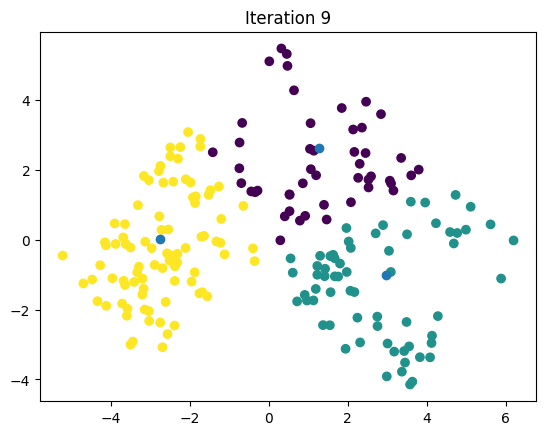

In [35]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [36]:
centroids

,0,1,2
Age,3.723925,7.426585,2.562036
Annual Income (k$),4.329183,3.610014,3.833329
Spending Score (1-100),2.734210,4.208857,7.377462


In [37]:
labels.value_counts()

2    89
1    64
0    47
Name: count, dtype: int64

In [38]:
df[labels == 0][['CustomerID','Gender']+features]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
14,15,Male,37,20,13
16,17,Female,35,21,35
20,21,Male,35,24,35
22,23,Female,46,25,5
28,29,Female,40,29,31
36,37,Female,42,34,17
38,39,Female,36,37,26


In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [40]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
Age,2.809943,4.589286,7.263221
Annual Income (k$),4.337722,5.896956,3.387167
Spending Score (1-100),7.377768,2.705539,4.633291
